In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def show_gaussian(mean, variance, time):
    plt.figure(figsize=(10,5))
    plt.plot(time, norm.pdf(time, mean, math.sqrt(variance)), label='Normal Distribution')
    plt.ylim(0, 0.1);
    plt.show()

In [12]:
def predict(meanOld, varOld, meanMove, varMove):
    result_mean = meanOld + meanMove
    result_var = varOld + varMove
    return [result_mean, result_var]

In [11]:
# Multiplying 2 Gaussian distributions
def update(meanPredict, varPredict, meanSensor, varSensor):
    result_mean = (varSensor * meanPredict + varPredict * meanSensor)/(varPredict + varSensor)
    result_var = 1/(1/varPredict + 1/varSensor)
    return [result_mean, result_var]

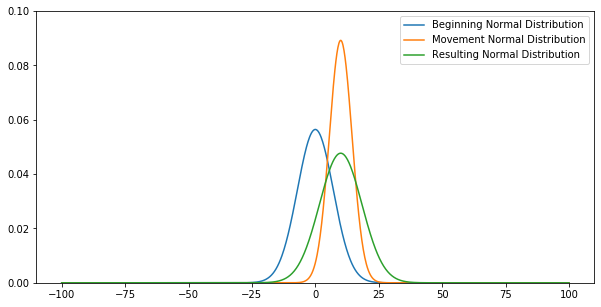

In [29]:
time = np.linspace(-100,100,1000)

# Gaussian distribution for initial point. Motion starts in the origin => mean = 0
mean0 = 0.0
var0 = 50.0

# Gaussian distribution for next point. Distance moved = meanMove
meanMove = 10.0
varMove  = 25.0

[meanPredict, varPredict] = predict(mean0, var0, meanMove, varMove)

# Predict. Modeling a resulting Gaussian distribution for predicted point.
plt.figure(figsize=(10,5))
plt.plot(time, norm.pdf(time, mean0, math.sqrt(var0)), label = 'Beginning Normal Distribution')
plt.plot(time, norm.pdf(time, meanMove, math.sqrt(varMove)), label = 'Movement Normal Distribution')
plt.plot(time, norm.pdf(time, meanPredict, math.sqrt(varPredict)), label = 'Resulting Normal Distribution')
plt.legend(loc = 'best');
plt.ylim(0, 0.1);
plt.show()


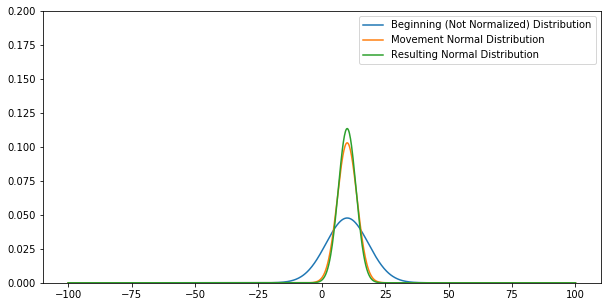

In [32]:
# Gaussian distribution for sensor reading
meanSensor = 10.0
varSensor  = 15.0

# Multiplying Predicted + Sensor reading Gaussian distributions

[meanResult, varResult] = update(meanPredict, varPredict, meanSensor, varSensor)

# Update. Modeling a best possible Gaussian distribution.
plt.figure(figsize=(10,5))
plt.plot(time, norm.pdf(time, meanPredict, math.sqrt(varPredict)), label = 'Beginning (Not Normalized) Distribution')
plt.plot(time, norm.pdf(time, meanSensor, math.sqrt(varSensor)), label = 'Movement Normal Distribution')
plt.plot(time, norm.pdf(time, meanResult, math.sqrt(varResult)), label = 'Resulting Normal Distribution')
plt.legend(loc = 'best');
plt.ylim(0, 0.2);
plt.show()


After correction:  mean = 8.97	var = 10.91
After correction:  mean = 19.96	var = 10.58
After correction:  mean = 30.30	var = 10.55
After correction:  mean = 39.85	var = 10.55
After correction:  mean = 48.65	var = 10.55


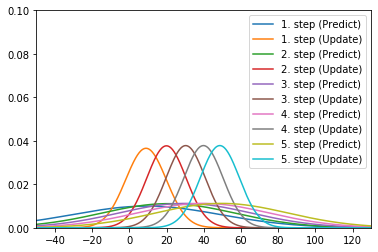

In [80]:
time = np.linspace(-150, 150, 1000)

n = 5
positions = (10, 20, 30, 40, 50) + np.random.randn(n)
distances = (10, 10, 10, 10, 10) + np.random.randn(n)

# print(positions)
# print(distances)

# Gaussian distribution for initial point. Motion starts in the origin => mean = 0
mean = 0.0
var = 15.0

# Gaussian distribution for next point.
varMove  = 25.0

for k in range(n):
    # Predict
    [mean, var] = predict(mean, var, distances[k], varMove)
    plt.plot(time, norm.pdf(time, mean, var), label='%i. step (Predict)' % (k + 1))
#     print('After prediction:  mean = %.2f\tvar = %.2f' % (mean, var))
    
    # Correct
    [mean, var] = update(mean, var, positions[k], varSensor)
    plt.plot(time, norm.pdf(time, mean, var), label='%i. step (Update)' % (k + 1))
    print('After correction:  mean = %.2f\tvar = %.2f' % (mean, var))
    
plt.ylim(0, 0.1)
plt.xlim(-50, 130)
plt.legend();
